In [1]:
# Purpose of this model: To classify images in the CIFAR-10 dataset
# Type of data:
# - 60000 32x32 color images in 10 classes
# -- 6000 images per class
# -- 50000 training images and 10000 test images
# -- 10 classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck

In [31]:
# Step 1: Importing dependencies to build CNN
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Importing CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Step 2: Shuffle and split the data between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Step 3: Determining how the data for each picture is stored
# It is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

This picture is of class 9


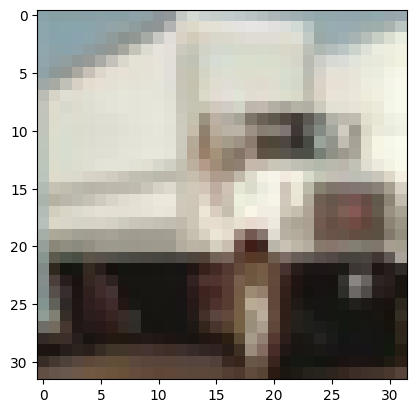

In [12]:
# Step 4: Looking at one of the images
print("This picture is of class", y_train[444][0])
plt.imshow(x_train[444])

In [18]:
# Step 5: Determining all numbers comveyed by the training images
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
# Step 6: Sort of "One hot encoding" the image classes
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [21]:
# Step 7: Making everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [25]:
# Step 8: Building the first CNN - using Keras' Sequential capabilities
model_1 = Sequential()

# 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5,5), strides = (2,2), padding='same',
                   input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

# Adding another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5,5), strides = (2,2)))
model_1.add(Activation('relu'))

# 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

# Flatten turns 3 x 3 x 32 into 288 x 1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

# Seeing the summary of the model
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Step 9: Training the first CNN

# Defining the batch size
batch_size = 32

# Initiating RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate = 5e-4, decay=1e-6)

# Training the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
                optimizer = opt,
                metrics = ['accuracy'])

model_1.fit(x_train, y_train,
            batch_size = batch_size,
            epochs = 15,
            validation_data = (x_test, y_test),
            shuffle = True)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.2921 - loss: 1.9146 - val_accuracy: 0.4611 - val_loss: 1.5258
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.4588 - loss: 1.5024 - val_accuracy: 0.5273 - val_loss: 1.3218
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.5085 - loss: 1.3726 - val_accuracy: 0.4960 - val_loss: 1.4275
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5331 - loss: 1.3039 - val_accuracy: 0.5889 - val_loss: 1.1758
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.5531 - loss: 1.2517 - val_accuracy: 0.5587 - val_loss: 1.2497
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5719 - loss: 1.2158 - val_accuracy: 0.6056 - val_loss: 1.1196
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.5816 - loss: 1.1807 - val_accuracy: 0.5868 - val_loss: 1.1713
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5895 -

In [33]:
# Step 10: Using the first CNN to make predictions for test set
predict_x = model_1.predict(x_test)
classes_x = np.argmax(predict_x,axis=1)
classes_x

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [36]:
# Step 11: Printing the actual Targets of the test set
classes_y_test = np.argmax(y_test,axis=1)
classes_y_test

array([3, 8, 8, ..., 5, 1, 7])

In [37]:
# Step 12: Evaluating the accuracy score of the first CNN
from sklearn.metrics import accuracy_score
accuracy_score(classes_y_test, classes_x)

0.6356